In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split, cross_validate

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
data = pd.read_csv('model_data.csv', index_col='PID')
data.shape

(2579, 24)

In [3]:
data.isna().sum().sort_values(ascending=False).head()

MSSubClass    0
GarageCars    0
PorchArea     0
GarageArea    0
2ndFlrSF      0
dtype: int64

#### Independent Variable (y)

In [4]:
y = data.SalePrice.copy()
data.drop('SalePrice', axis=1, inplace=True)

#### Choose Dependents (Use Sector or Neighborhood) (Use ALLSF, or split columns)

In [5]:
data.columns

Index(['MSSubClass', 'GarageCars', 'GarageType', 'BsmtQual', 'Foundation',
       'PavedDrive', 'TotalBsmtSF', 'AllBathBsmt', 'AllBathAbv',
       'TotRmsAbvGrd', 'Fireplaces', 'HeatingQC', 'Neighborhood', 'Sector',
       'YearBuilt', 'OverallQual', 'LotFrontage', 'HasPool', '1stFlrSF',
       '2ndFlrSF', 'GarageArea', 'PorchArea', 'ALLSF'],
      dtype='object')

* Sectors & ALLSF

In [6]:
data_1 = data.drop(['Neighborhood','1stFlrSF', '2ndFlrSF', 'GarageArea', 'PorchArea', 'TotalBsmtSF'],axis=1)

* Sectors & Split SF

In [7]:
data_2 = data.drop(['Neighborhood','ALLSF'],axis=1)

* Neighborhood & ALLSF

In [8]:
data_3 = data.drop(['Sector','1stFlrSF', '2ndFlrSF', 'GarageArea', 'PorchArea', 'TotalBsmtSF'],axis=1)

* Neighborhood & Split SF

In [9]:
data_4 = data.drop(['Sector','ALLSF'],axis=1)

## 📉 Multiple Regression😗😎

#### Data_1

In [30]:
lasso = Lasso(max_iter=10000)

data_dum = pd.get_dummies(data_1, drop_first=True)
scores = cross_validate(lasso, data_dum, np.log10(y), cv=4)
np.mean(scores['test_score'])

0.6441628927347838

In [32]:
pd.set_option("display.max_columns", None)
data_dum

,GarageCars,AllBathBsmt,AllBathAbv,TotRmsAbvGrd,Fireplaces,YearBuilt,OverallQual,LotFrontage,HasPool,ALLSF,MSSubClass_1FlPUD,MSSubClass_2Fl,MSSubClass_2FlPUD,MSSubClass_DUP2FAM,MSSubClass_SPLIT,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_Po,BsmtQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,PavedDrive_P,PavedDrive_Y,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Sector_NO,Sector_NW,Sector_SE,Sector_SW
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
526301100,2.0,1.0,1.0,7,2,1960,6,141.0,0,3536.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0
526302030,2.0,1.0,2.0,5,0,1954,6,0.0,0,3203.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0
526302040,1.0,1.0,1.0,5,2,1956,6,85.0,0,2625.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0
526302110,1.0,0.0,1.0,5,0,1956,6,74.0,0,2266.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0
526302120,3.0,0.0,1.5,7,1,1957,5,0.0,0,4377.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924100070,2.0,1.0,1.0,6,1,1974,5,77.0,0,3474.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0
924151040,2.0,1.5,2.5,6,2,1994,8,76.0,0,4379.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
924151050,3.0,0.0,2.5,9,1,1993,7,74.0,0,3884.0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0


#### Data_2

In [33]:
data_dum = pd.get_dummies(data_2, drop_first=True)
scores = cross_validate(lasso, data_dum, np.log10(y), cv=4)
np.mean(scores['test_score'])

0.6435204263023239

In [12]:
data_dum = pd.get_dummies(data_2, drop_first=True)
scores = cross_validate(lasso, data_dum, np.log10(y), cv=4)
np.mean(scores['test_score'])

0.6435204263023239

#### Data_3

In [34]:
data_dum = pd.get_dummies(data_3, drop_first=True)
scores = cross_validate(lasso, data_dum, np.log10(y), cv=4)
np.mean(scores['test_score'])

0.6441628927347838

#### Data_4

In [36]:
data_dum = pd.get_dummies(data_4, drop_first=True)
scores = cross_validate(lasso, data_dum, np.log10(y), cv=4)
np.mean(scores['test_score'])

0.6435204263023239

In [46]:
X_train, X_test, y_train, y_test = train_test_split(data_dum, y, test_size=0.3)

In [47]:
lasso.fit(X_train,np.log10(y_train))
lasso.score(X_test,np.log10(y_test))

0.7492106104423777

In [48]:
lasso.set_params(normalize=True, random_state=44)
lasso.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 10000,
 'normalize': True,
 'positive': False,
 'precompute': False,
 'random_state': 44,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [58]:
#try different alphas
alphas = np.linspace(0.000001,0.0001,40)
coefs_lasso = []
R2_train = []
R2_test = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, np.log10(y_train))
    coefs_lasso.append(lasso.coef_)
    R2_train.append(lasso.score(X_train, np.log10(y_train)))
    R2_test.append(lasso.score(X_test, np.log10(y_test)))

In [59]:
coefs_lasso = pd.DataFrame(coefs_lasso, index = alphas, columns = X_train.columns)
R2_lasso = pd.DataFrame({'train': R2_train,'test':R2_test}, index = alphas)
coefs_lasso.head(2)

,GarageCars,TotalBsmtSF,AllBathBsmt,AllBathAbv,TotRmsAbvGrd,Fireplaces,YearBuilt,OverallQual,LotFrontage,HasPool,1stFlrSF,2ndFlrSF,GarageArea,PorchArea,MSSubClass_1FlPUD,MSSubClass_2Fl,MSSubClass_2FlPUD,MSSubClass_DUP2FAM,MSSubClass_SPLIT,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_Po,BsmtQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,PavedDrive_P,PavedDrive_Y,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0.000001,0.006238,0.000030,0.030182,0.010457,-0.001430,0.011555,0.000570,0.034274,0.000035,0.009811,0.000120,0.000100,0.000035,0.000057,-0.035531,0.003871,-0.058795,-0.029109,0.009755,0.013145,-0.000260,-0.001729,0.006884,0.009298,-0.001707,-0.046410,-0.022287,-0.068013,-0.020038,-0.023304,0.017486,0.019598,0.047773,0.049088,-0.011264,0.031418,0.032261,-0.056596,-0.005342,-0.087183,-0.025047,0.006039,-0.028865,-0.008697,0.022778,-0.002743,0.049034,-0.025451,-0.005176,0.027853,0.243334,-0.047093,0.0,-0.049050,-0.004774,-0.012215,0.004025,-0.002687,0.012001,0.028328,-0.022176,-0.021937,-0.000000,-0.021901,0.025264,0.042672,0.021043,0.016353
0.000004,0.006163,0.000031,0.030262,0.010431,-0.000774,0.011621,0.000597,0.034746,0.000033,0.007096,0.000118,0.000098,0.000036,0.000057,-0.033434,0.003877,-0.056243,-0.029547,0.009057,0.008073,-0.005346,-0.005709,0.000000,0.003416,-0.006452,-0.041875,-0.019004,-0.060426,-0.009864,-0.019637,0.015707,0.017873,0.041850,0.046037,-0.009463,0.029678,0.031716,-0.055051,-0.004729,-0.081841,-0.024325,0.005545,-0.026033,-0.003379,0.025461,0.000000,0.052517,-0.020697,-0.001734,0.027054,0.239650,-0.042033,0.0,-0.046031,-0.000749,-0.008078,0.003969,0.000000,0.014575,0.030331,-0.017253,-0.016398,0.003229,-0.018260,0.027087,0.043757,0.022989,0.018010


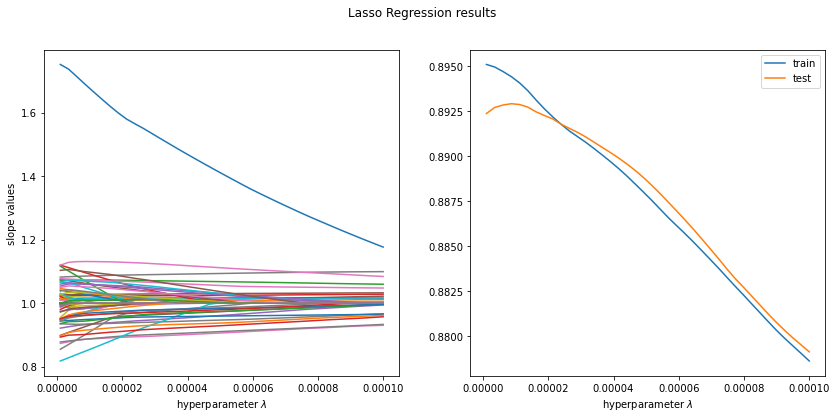

In [61]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))
fig.suptitle('Lasso Regression results')

for feat in coefs_lasso.columns:
    ax1.plot(coefs_lasso.index, 10**coefs_lasso[feat]) 
ax1.set_xlabel(r'hyperparameter $\lambda$')
ax1.set_ylabel(r'slope values')
#ax1.legend(loc=1)
for each in R2_lasso.columns:
    ax2.plot(R2_lasso.index, R2_lasso[each], label=each)
ax2.set_xlabel(r'hyperparameter $\lambda$')
ax2.legend(loc=1)

## 🌲 Prepare for RandomForest

In [12]:
from sklearn import ensemble
from sklearn.preprocessing import LabelEncoder

In [14]:
data_le = data_4.copy()
data_le.columns

Index(['MSSubClass', 'GarageCars', 'GarageType', 'BsmtQual', 'Foundation',
       'PavedDrive', 'TotalBsmtSF', 'AllBathBsmt', 'AllBathAbv',
       'TotRmsAbvGrd', 'Fireplaces', 'HeatingQC', 'Neighborhood', 'YearBuilt',
       'OverallQual', 'LotFrontage', 'HasPool', '1stFlrSF', '2ndFlrSF',
       'GarageArea', 'PorchArea'],
      dtype='object')

In [68]:
data_le['BsmtQual'].value_counts()

TA      1166
Gd      1076
Ex       188
Fa        78
None      69
Po         2
Name: BsmtQual, dtype: int64

In [15]:
# Use LabelEncoder on Categorical features
le = LabelEncoder()
data_le.MSSubClass = le.fit_transform(data.MSSubClass)
data_le.GarageType = le.fit_transform(data.GarageType)
data_le.Foundation = le.fit_transform(data.Foundation)
data_le.PavedDrive = le.fit_transform(data.PavedDrive)
data_le.Neighborhood = le.fit_transform(data.Neighborhood)
# Manually Encode Ordinal features
# Replaced np.NaN with 'None' for BsmtQual
data_le.BsmtQual = data_le.BsmtQual.replace({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5,'None':0})
data_le.HeatingQC = data_le.HeatingQC.replace({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

In [72]:
data_le['BsmtQual'].value_counts()

3    1166
4    1076
5     188
2      78
0      69
1       2
Name: BsmtQual, dtype: int64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(data_le, y, test_size=0.25)
forest = ensemble.RandomForestRegressor()
forest.set_params(n_estimators=50, random_state=42, max_features=10)
forest.fit(X_train, y_train)
print("The training r2: %.5f" %(forest.score(X_train, y_train)))
print("The test     r2: %.5f" %(forest.score(X_test, y_test)))

The training r2: 0.98161
The test     r2: 0.88858


In [94]:
results_y = []
for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(data_le, y, test_size=0.25)
    forest = ensemble.RandomForestRegressor()
    forest.set_params(n_estimators=50, random_state=42, max_features=10)
    forest.fit(X_train, y_train)
    #print("The training r2: %.5f" %(forest.score(X_train, y_train)))
    #print("The test     r2: %.5f" %(forest.score(X_test, y_test)))
    results_y.append(forest.score(X_test, y_test))
print("Average:  " + str(np.mean(results_y)))
print("Std. Dev.:  " + str(np.std(results_y)))

Average:  0.8796149411813536
Std. Dev.:  0.01937052974298503


In [95]:
results_logy = []
for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(data_le, np.log10(y), test_size=0.25)
    forest = ensemble.RandomForestRegressor()
    forest.set_params(n_estimators=50, random_state=42, max_features=10)
    forest.fit(X_train, y_train)
    #print("The training r2: %.5f" %(forest.score(X_train, y_train)))
    #print("The test     r2: %.5f" %(forest.score(X_test, y_test)))
    results_logy.append(forest.score(X_test, y_test))
print("Average:  " + str(np.mean(results_logy)))
print("Std. Dev.:  " + str(np.std(results_logy)))

Average:  0.8741789185262381
Std. Dev.:  0.015013200607303325


### Some Overfit?

In [96]:
forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 10,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [20]:
from sklearn.model_selection import GridSearchCV

In [101]:
grid_para_forest = [{
    "max_features":np.arange(1,15,1),
    "max_depth": np.linspace(start=6, stop=50, num=13, dtype=int)}]
gs_forest = GridSearchCV(forest, grid_para_forest, scoring='r2', cv=4, n_jobs=-1)
%time gs_forest.fit(X_train, y_train)

CPU times: user 1.35 s, sys: 127 ms, total: 1.48 s
Wall time: 19.2 s


GridSearchCV(cv=4,
             estimator=RandomForestRegressor(max_features=10, n_estimators=50,
                                             random_state=42),
             n_jobs=-1,
             param_grid=[{'max_depth': array([ 6,  9, 13, 17, 20, 24, 28, 31, 35, 39, 42, 46, 50]),
                          'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])}],
             scoring='r2')

In [102]:
gs_forest.best_params_

{'max_depth': 20, 'max_features': 10}

In [171]:
gs_forest.best_params_

{'max_depth': 26, 'max_features': 8}

In [103]:
print("The training r2: %.5f" % (gs_forest.score(X_train, y_train)))
print("The test     r2: %.5f" % (gs_forest.score(X_test, y_test)))

The training r2: 0.98124
The test     r2: 0.89048


In [172]:
print("The training r2: %.5f" % (gs_forest.score(X_train, y_train)))
print("The test     r2: %.5f" % (gs_forest.score(X_test, y_test)))

The training r2: 0.98341
The test     r2: 0.85717


In [104]:
pd.DataFrame({'Feat':X_train.columns,'Importance':gs_forest.best_estimator_.feature_importances_}).\
sort_values(by='Importance', ascending=False)

,Feat,Importance
14,OverallQual,0.338011
8,AllBathAbv,0.111952
13,YearBuilt,0.092346
17,1stFlrSF,0.074569
19,GarageArea,0.072225
6,TotalBsmtSF,0.063171
3,BsmtQual,0.052278
18,2ndFlrSF,0.035519
1,GarageCars,0.027391
2,GarageType,0.019941


In [173]:
pd.DataFrame({'Feat':X_train.columns,'Importance':gs_forest.best_estimator_.feature_importances_}).\
sort_values(by='Importance', ascending=False)

,Feat,Importance
14,OverallQual,0.282800
1,GarageCars,0.127154
6,TotalBsmtSF,0.110044
16,1stFlrSF,0.073829
13,YearBuilt,0.070696
18,GarageArea,0.067861
8,AllBathAbv,0.051542
3,BsmtQual,0.046765
17,2ndFlrSF,0.034919
10,Fireplaces,0.025677


## 🚀 Boosting

In [105]:
from sklearn.ensemble import GradientBoostingRegressor

In [108]:
gbm = GradientBoostingRegressor()
gbm.fit(X_train, y_train)
gbm.score(X_test, y_test)

0.896102021840385

In [109]:
gbm.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [110]:
grid_para_boost = [{
    "learning_rate":[0.1,0.25,0.5,1],
    "max_depth": np.linspace(start=6, stop=30, num=13, dtype=int)}]
gs_boost = GridSearchCV(gbm, grid_para_boost, scoring='r2', cv=5, n_jobs=-1)
%time gs_boost.fit(X_train, y_train)

CPU times: user 1.19 s, sys: 92.2 ms, total: 1.29 s
Wall time: 36.8 s


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid=[{'learning_rate': [0.1, 0.25, 0.5, 1],
                          'max_depth': array([ 6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30])}],
             scoring='r2')

In [111]:
gs_boost.best_params_

{'learning_rate': 0.1, 'max_depth': 6}

In [92]:
gs_boost.best_params_

{'learning_rate': 0.1, 'max_depth': 6}

In [93]:
print("The training r2: %.5f" % (gs_boost.score(X_train, y_train)))
print("The test     r2: %.5f" % (gs_boost.score(X_test, y_test)))

The training r2: 0.98753
The test     r2: 0.87752


In [112]:
print("The training r2: %.5f" % (gs_boost.score(X_train, y_train)))
print("The test     r2: %.5f" % (gs_boost.score(X_test, y_test)))

The training r2: 0.98528
The test     r2: 0.89202


### More tuning

In [ ]:
grid_para_boost = [{
    "learning_rate":np.linspace(0.01, 0.1, 5),
    "max_depth": np.linspace(start=1, stop=11, num=5, dtype=int)}]
gs_boost = GridSearchCV(gbm, grid_para_boost, scoring='r2', cv=5, n_jobs=-1)
%time gs_boost.fit(X_train, y_train)

# 🤖 SVM 

## kernel = 'rbf'

In [21]:
from sklearn.svm import SVR
svr = SVR()
svr.set_params(kernel='rbf')

paramDict = {'C':np.linspace(8e8,8e9,4),
            'gamma':np.linspace(1e-8, 1e-7, 4)}
grid = GridSearchCV(svr, paramDict, cv=3, return_train_score = True, n_jobs=-1, verbose=4)
ans_svr  = grid.fit(X_train, y_train) 
svr_best = ans_svr.best_estimator_
svr_best.fit(X_train, y_train)
print("The training r2: %.5f" % (svr_best.score(X_train, y_train)))
print("The test     r2: %.5f" % (svr_best.score(X_test, y_test)))
print(ans_svr.best_params_)
print(ans_svr.best_score_)
#The training r2: 0.91025
#The test     r2: 0.89471
#{'C': 800000000.0, 'gamma': 1e-07}
#0.8281109312299773

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END C=800000000.0, gamma=1e-08;, score=(train=0.862, test=0.650) total time=   2.5s
[CV 3/3] END C=800000000.0, gamma=6.999999999999999e-08;, score=(train=0.899, test=0.869) total time=  42.6s
[CV 3/3] END C=3200000000.0, gamma=4e-08;, score=(train=0.903, test=0.884) total time= 2.7min
[CV 1/3] END C=5600000000.0, gamma=1e-08;, score=(train=0.887, test=0.613) total time=  30.7s
[CV 1/3] END C=5600000000.0, gamma=4e-08;, score=(train=0.910, test=0.585) total time= 2.6min
[CV 2/3] END C=5600000000.0, gamma=1e-07;, score=(train=0.932, test=0.349) total time=16.4min
[CV 3/3] END C=800000000.0, gamma=4e-08;, score=(train=0.884, test=0.883) total time=  24.3s
[CV 1/3] END C=3200000000.0, gamma=1e-08;, score=(train=0.881, test=0.620) total time=  13.4s
[CV 2/3] END C=3200000000.0, gamma=4e-08;, score=(train=0.913, test=0.861) total time= 1.7min
[CV 3/3] END C=3200000000.0, gamma=1e-07;, score=(train=0.922, test=0.867) total

Fitting 3 folds for each of 16 candidates, totalling 48 fits

The training r2: 0.90098\
The test     r2: 0.86120\
{'C': 800000000.0, 'gamma': 5e-08}\
0.8551222523310237\

- Fitting 3 folds for each of 16 candidates, totalling 48 fits

- The training r2: 0.88791
- The test     r2: 0.84290
- {'C': 100000000.0, 'gamma': 1e-07}
- 0.8427270684881721

Fitting 3 folds for each of 16 candidates, totalling 48 fits

The training r2: 0.90633\
The test     r2: 0.86033\
{'C': 400000000.0, 'gamma': 1e-07}\
0.8598446497790472